# **Fares Ahmed Moustafa**
### ***F.ahmed2270@nu.edu.eg***

## ***Imports and Dataset Upload***

In [214]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("fifa_18_sample_data.csv")

In [215]:
df.head(3)

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,

In [218]:
print(df.columns.tolist())

['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age', 'league', 'birth_date', 'height_cm', 'weight_kg', 'body_type', 'real_face', 'flag', 'nationality', 'photo', 'eur_value', 'eur_wage', 'eur_release_clause', 'overall', 'potential', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'international_reputation', 'skill_moves', 'weak_foot', 'work_rate_att', 'work_rate_def', 'preferred_foot', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'rs', 'rw', 'rf', 'ram', 'rcm', 'rm', 'rdm', 'rcb', 'rb', 'rwb', 'st', 'lw', 'cf', 'cam', 'cm', 'lm', 'cdm', 'cb', 'lb', 

## ***EDA***

In [199]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.head()

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,20801,2228,32,185.0,80.0,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN
1,158023,2158,30,170.0,72.0,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN
2,190871,2100,25,175.0,68.0,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,75,89,62,81,83,96,81,84,75,95,94,90,96,88,82,80,61,78,53,77,56,36,90,80,81,92,21,24,33,9,9,15,15,11,84.0,89.0,88.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,89.0,88.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN
3,176580,2291,30,182.0,86.0,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45,38,27,25,31,33,37,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN
4,167495,1493,31,193.0,92.0,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,15,13,25,55,11,30,14,11,59,48,58,61,52,85,35,25,78,44,83,16,29,30,12,70,47,70,10,10,11,91,90,95,91,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0


<Figure size 2000x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap (Multicollinearity Check)')

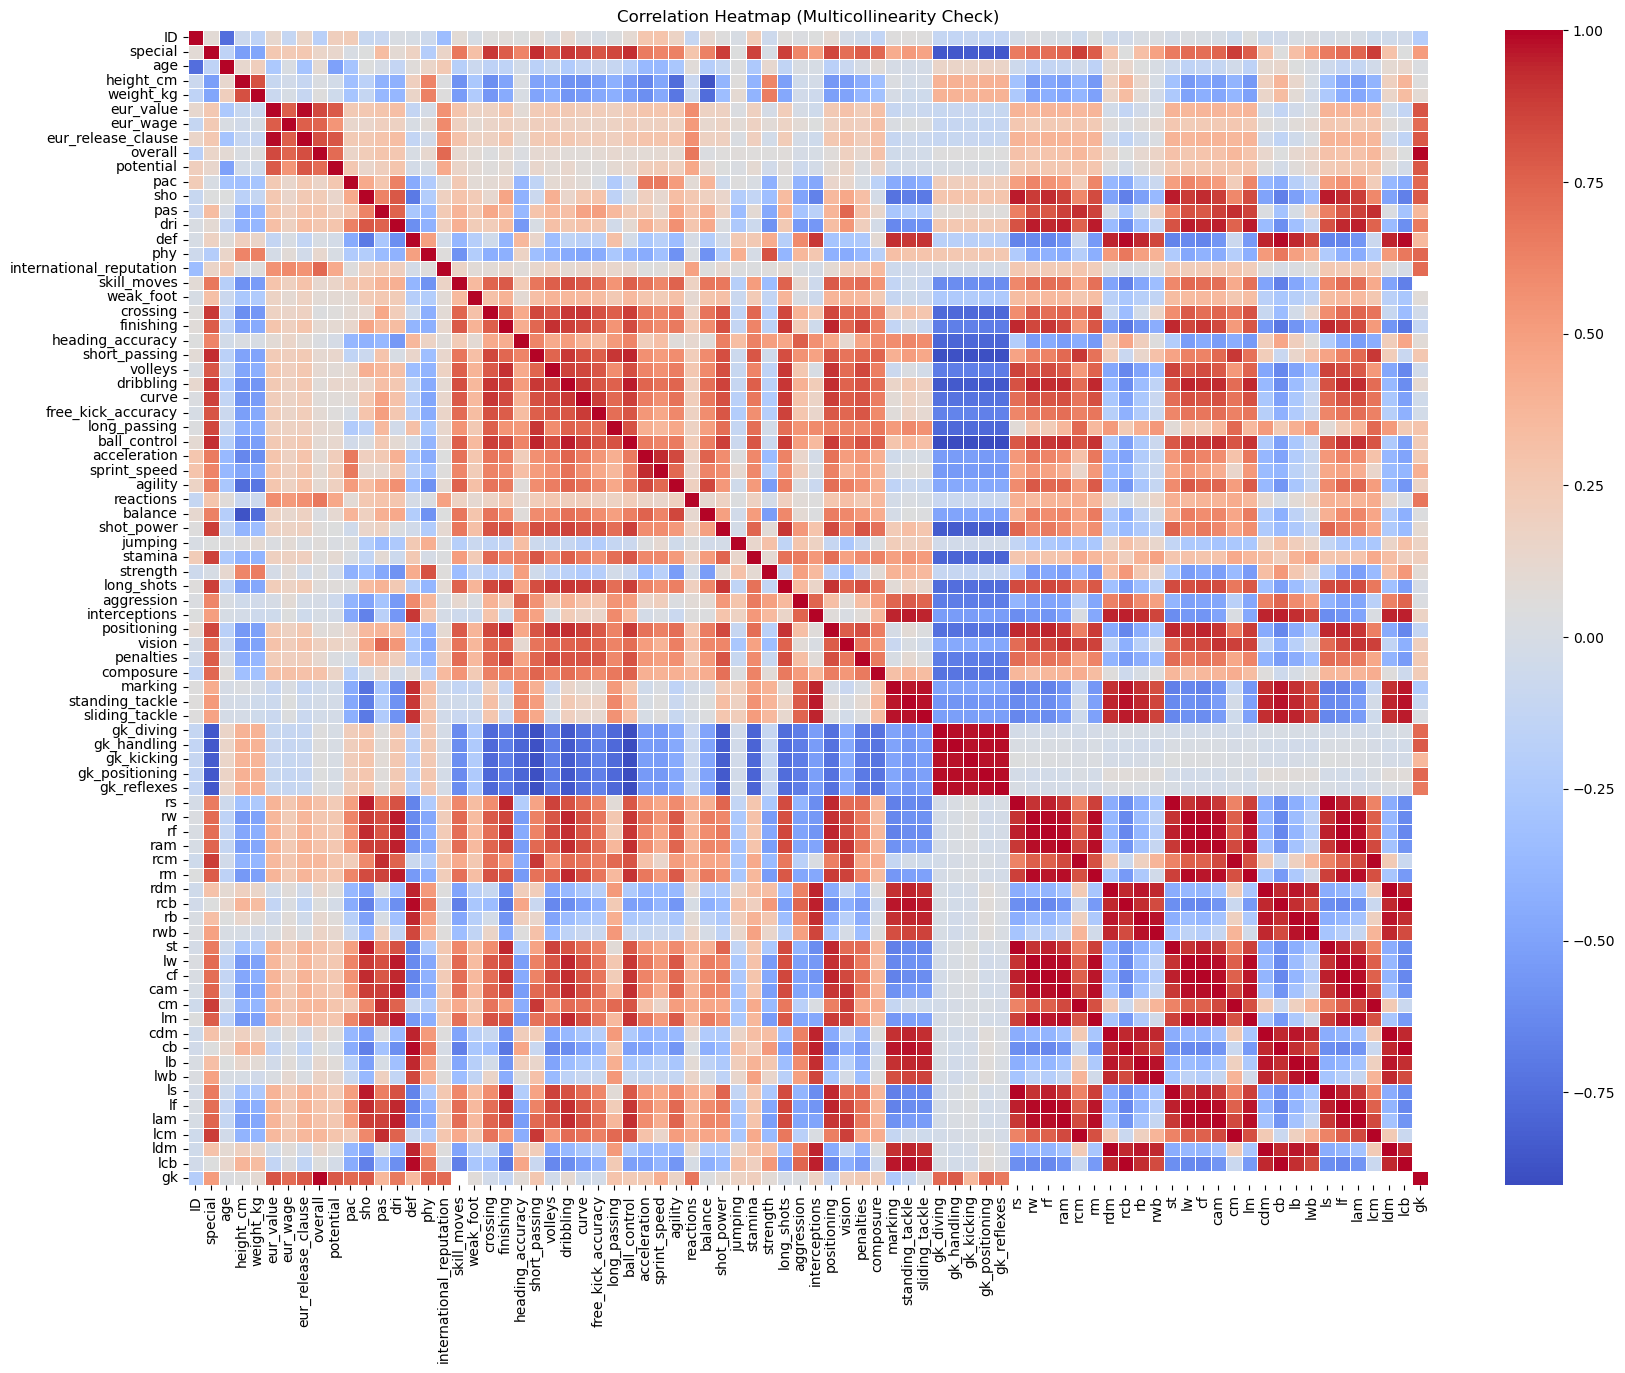

In [200]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Multicollinearity Check)")
plt.show()

In [201]:
threshold = 0.8
high_corr_pairs = []

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            high_corr_pairs.append((i, j, corr_matrix.loc[i, j]))

high_corr_pairs[:20]

[('special', 'crossing', np.float64(0.8914828449972313)),
 ('special', 'short_passing', np.float64(0.9215380682618556)),
 ('special', 'dribbling', np.float64(0.9024162701010581)),
 ('special', 'curve', np.float64(0.861746373107519)),
 ('special', 'free_kick_accuracy', np.float64(0.8032421863482639)),
 ('special', 'long_passing', np.float64(0.8500938699538123)),
 ('special', 'ball_control', np.float64(0.9221689802689018)),
 ('special', 'shot_power', np.float64(0.8777394895260598)),
 ('special', 'stamina', np.float64(0.8654124639561199)),
 ('special', 'long_shots', np.float64(0.8723037614680742)),
 ('special', 'positioning', np.float64(0.8476397384011569)),
 ('special', 'gk_diving', np.float64(-0.846310371443867)),
 ('special', 'gk_handling', np.float64(-0.8449935689692583)),
 ('special', 'gk_kicking', np.float64(-0.8342511453050515)),
 ('special', 'gk_positioning', np.float64(-0.8453937124450576)),
 ('special', 'gk_reflexes', np.float64(-0.8464521207433442)),
 ('special', 'rcm', np.floa

In [202]:
duplicate_cols = []
cols = df.columns

for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if df[cols[i]].equals(df[cols[j]]):
            duplicate_cols.append((cols[i], cols[j]))

duplicate_cols

[('rs', 'st'),
 ('rs', 'ls'),
 ('rw', 'lw'),
 ('rf', 'cf'),
 ('rf', 'lf'),
 ('ram', 'cam'),
 ('ram', 'lam'),
 ('rcm', 'cm'),
 ('rcm', 'lcm'),
 ('rm', 'lm'),
 ('rdm', 'cdm'),
 ('rdm', 'ldm'),
 ('rcb', 'cb'),
 ('rcb', 'lcb'),
 ('rb', 'lb'),
 ('rwb', 'lwb'),
 ('st', 'ls'),
 ('cf', 'lf'),
 ('cam', 'lam'),
 ('cm', 'lcm'),
 ('cdm', 'ldm'),
 ('cb', 'lcb'),
 ('acrobatic_clearance_trait', 'argues_with_officials_trait'),
 ('acrobatic_clearance_trait', 'bicycle_kicks_trait'),
 ('acrobatic_clearance_trait', 'chipped_penalty_trait'),
 ('acrobatic_clearance_trait', 'diving_header_trait'),
 ('acrobatic_clearance_trait', 'driven_pass_trait'),
 ('acrobatic_clearance_trait', "fan's_favourite_trait"),
 ('acrobatic_clearance_trait', 'fancy_flicks_trait'),
 ('acrobatic_clearance_trait', 'flair_passes_trait'),
 ('acrobatic_clearance_trait', 'gk_flat_kick_trait'),
 ('acrobatic_clearance_trait', 'inflexible_trait'),
 ('acrobatic_clearance_trait', 'second_wind_trait'),
 ('acrobatic_clearance_trait', 'stutter_p

In [203]:
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
constant_cols

['acrobatic_clearance_trait',
 'argues_with_officials_trait',
 'bicycle_kicks_trait',
 'chipped_penalty_trait',
 'diving_header_trait',
 'driven_pass_trait',
 "fan's_favourite_trait",
 'fancy_flicks_trait',
 'flair_passes_trait',
 'gk_flat_kick_trait',
 'inflexible_trait',
 'second_wind_trait',
 'stutter_penalty_trait',
 'swerve_pass_trait',
 'prefers_rs',
 'prefers_rf',
 'prefers_ram',
 'prefers_rcm',
 'prefers_rdm',
 'prefers_rcb',
 'prefers_ls',
 'prefers_lf',
 'prefers_lam',
 'prefers_lcm',
 'prefers_ldm',
 'prefers_lcb']

In [204]:
missing_percent = df.isnull().mean() * 100

massive_missing = missing_percent[missing_percent > 50]
massive_missing

gk    88.7
dtype: float64

In [205]:
non_numeric = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
non_numeric

['name',
 'full_name',
 'club',
 'club_logo',
 'league',
 'birth_date',
 'body_type',
 'real_face',
 'flag',
 'nationality',
 'photo',
 'work_rate_att',
 'work_rate_def',
 'preferred_foot',
 '1_on_1_rush_trait',
 'acrobatic_clearance_trait',
 'argues_with_officials_trait',
 'avoids_using_weaker_foot_trait',
 'backs_into_player_trait',
 'bicycle_kicks_trait',
 'cautious_with_crosses_trait',
 'chip_shot_trait',
 'chipped_penalty_trait',
 'comes_for_crosses_trait',
 'corner_specialist_trait',
 'diver_trait',
 'dives_into_tackles_trait',
 'diving_header_trait',
 'driven_pass_trait',
 'early_crosser_trait',
 "fan's_favourite_trait",
 'fancy_flicks_trait',
 'finesse_shot_trait',
 'flair_trait',
 'flair_passes_trait',
 'gk_flat_kick_trait',
 'gk_long_throw_trait',
 'gk_up_for_corners_trait',
 'giant_throw_in_trait',
 'inflexible_trait',
 'injury_free_trait',
 'injury_prone_trait',
 'leadership_trait',
 'long_passer_trait',
 'long_shot_taker_trait',
 'long_throw_in_trait',
 'one_club_player_tr

## ***Preprocessing***

In [206]:
prefers_cols = [col for col in df.columns if col.startswith("prefers_")]

df[prefers_cols] = df[prefers_cols].astype(int)
df.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,92.0,92.0,8

In [ ]:
drop_cols = [
    "ID", "name", "full_name", "club", "club_logo", "flag", "nationality",
    "photo", "birth_date", "body_type", "real_face",
    "work_rate_att", "work_rate_def", "preferred_foot",
    "special",
]
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)

gk_cols = [
    "gk_diving", "gk_handling", "gk_kicking", 
    "gk_positioning", "gk_reflexes", "gk"
]
df.drop(columns=[c for c in gk_cols if c in df.columns], inplace=True)

position_cols = [
    "rs","rw","rf","ram","rcm","rm","rdm","rcb","rb","rwb",
    "st","lw","cf","cam","cm","lm","cdm","cb","lb","lwb",
    "ls","lf","lam","lcm","ldm","lcb"
]
df.drop(columns=[c for c in position_cols if c in df.columns], inplace=True)

constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)

pattern_cols = [col for col in df.columns 
                if re.search(r'(.*_trait$|.*_speciality$|^prefers_)', col)]
df.drop(columns=pattern_cols, inplace=True)

multicollinear_cols = [
    'long_shots', 'volleys', 'positioning', 'penalties', 'shot_power',

    'short_passing', 'long_passing', 'curve','sprint_speed','ball_control',

    'crossing', 'free_kick_accuracy',

    'marking','standing_tackle', 'sliding_tackle',

    'eur_wage', 'eur_release_clause'
]
df.drop(columns=[c for c in multicollinear_cols if c in df.columns], inplace=True)

if "height_cm" in df.columns and "weight_kg" in df.columns:
    df["BMI"] = df["weight_kg"] / (df["height_cm"]/100)**2
    df.drop(columns=["height_cm", "weight_kg"], inplace=True)

df.head()

,age,league,eur_value,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,finishing,heading_accuracy,dribbling,acceleration,agility,reactions,balance,jumping,stamina,strength,aggression,interceptions,vision,composure,BMI
0,32,Spanish Primera División,95500000.0,94,94,90,93,82,90,33,80,5,5,4,94,88,91,89,89,96,63,95,92,80,63,29,85,95,23.374726
1,30,Spanish Primera División,105000000.0,93,93,89,90,86,96,26,61,5,4,4,95,71,97,92,90,95,95,68,73,59,48,22,90,96,24.913495
2,25,French Ligue 1,123000000.0,92,94,92,84,79,95,30,60,5,5,5,89,62,96,94,96,88,82,61,78,53,56,36,80,92,22.204082
3,30,Spanish Primera División,97000000.0,92,92,82,90,79,87,42,81,5,4,4,94,77,86,88,86,93,60,69,89,80,78,41,84,83,25.963048
4,31,German Bundesliga,61000000.0,92,92,91,90,95,89,60,91,5,1,4,13,25,30,58,52,85,35,78,44,83,29,30,70,70,24.698650


In [ ]:
df = df.select_dtypes(include=["int64", "float64"])

df.dropna(inplace=True)

df.head()

,age,eur_value,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,finishing,heading_accuracy,dribbling,acceleration,agility,reactions,balance,jumping,stamina,strength,aggression,interceptions,vision,composure,BMI
0,32,95500000.0,94,94,90,93,82,90,33,80,5,5,4,94,88,91,89,89,96,63,95,92,80,63,29,85,95,23.374726
1,30,105000000.0,93,93,89,90,86,96,26,61,5,4,4,95,71,97,92,90,95,95,68,73,59,48,22,90,96,24.913495
2,25,123000000.0,92,94,92,84,79,95,30,60,5,5,5,89,62,96,94,96,88,82,61,78,53,56,36,80,92,22.204082
3,30,97000000.0,92,92,82,90,79,87,42,81,5,4,4,94,77,86,88,86,93,60,69,89,80,78,41,84,83,25.963048
4,31,61000000.0,92,92,91,90,95,89,60,91,5,1,4,13,25,30,58,52,85,35,78,44,83,29,30,70,70,24.698650


In [183]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

X = df
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)

X_scaled.head()

,age,eur_value,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,finishing,heading_accuracy,dribbling,acceleration,agility,reactions,balance,jumping,stamina,strength,aggression,interceptions,vision,composure,BMI
0,1.278560,5.669160,4.662626,3.177755,1.408705,1.859360,1.200250,1.516023,-1.267680,0.791290,3.49595,2.281257,1.011623,1.621480,1.302216,1.099248,1.324356,1.342009,3.895783,-0.224560,2.155714,1.333102,0.732958,-0.153864,-1.171981,1.218773,2.116507,0.136034
1,0.730997,6.363051,4.319685,2.904635,1.322667,1.640337,1.653517,2.151673,-1.617523,-1.435055,3.49595,1.279388,1.011623,1.665493,0.485870,1.377539,1.530685,1.412407,3.681917,1.868018,-0.203218,0.113371,-1.062460,-0.988572,-1.465595,1.565805,2.216000,1.330513
2,-0.637911,7.677792,3.976744,3.177755,1.580782,1.202291,0.860300,2.045731,-1.417613,-1.552231,3.49595,2.281257,2.344460,1.401415,0.053687,1.331157,1.668238,1.834799,2.184855,1.017908,-0.814792,0.434353,-1.575437,-0.543395,-0.878367,0.871742,1.818029,-0.772686
3,0.730997,5.778721,3.976744,2.631514,0.720399,1.640337,0.860300,1.198199,-0.817882,0.908466,3.49595,1.279388,1.011623,1.621480,0.773992,0.867339,1.255580,1.130813,3.254185,-0.420739,-0.115850,1.140513,0.732958,0.680843,-0.668643,1.149367,0.922595,2.145235
4,1.004778,3.149239,3.976744,2.631514,1.494743,1.640337,2.673367,1.410082,0.081713,2.080227,3.49595,-1.726222,1.011623,-1.943567,-1.723066,-1.730040,-0.807709,-1.262740,1.543257,-2.055565,0.670461,-1.748324,0.989446,-2.045869,-1.130036,0.177680,-0.370809,1.163738


<Figure size 2000x1500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap (Multicollinearity Check)')

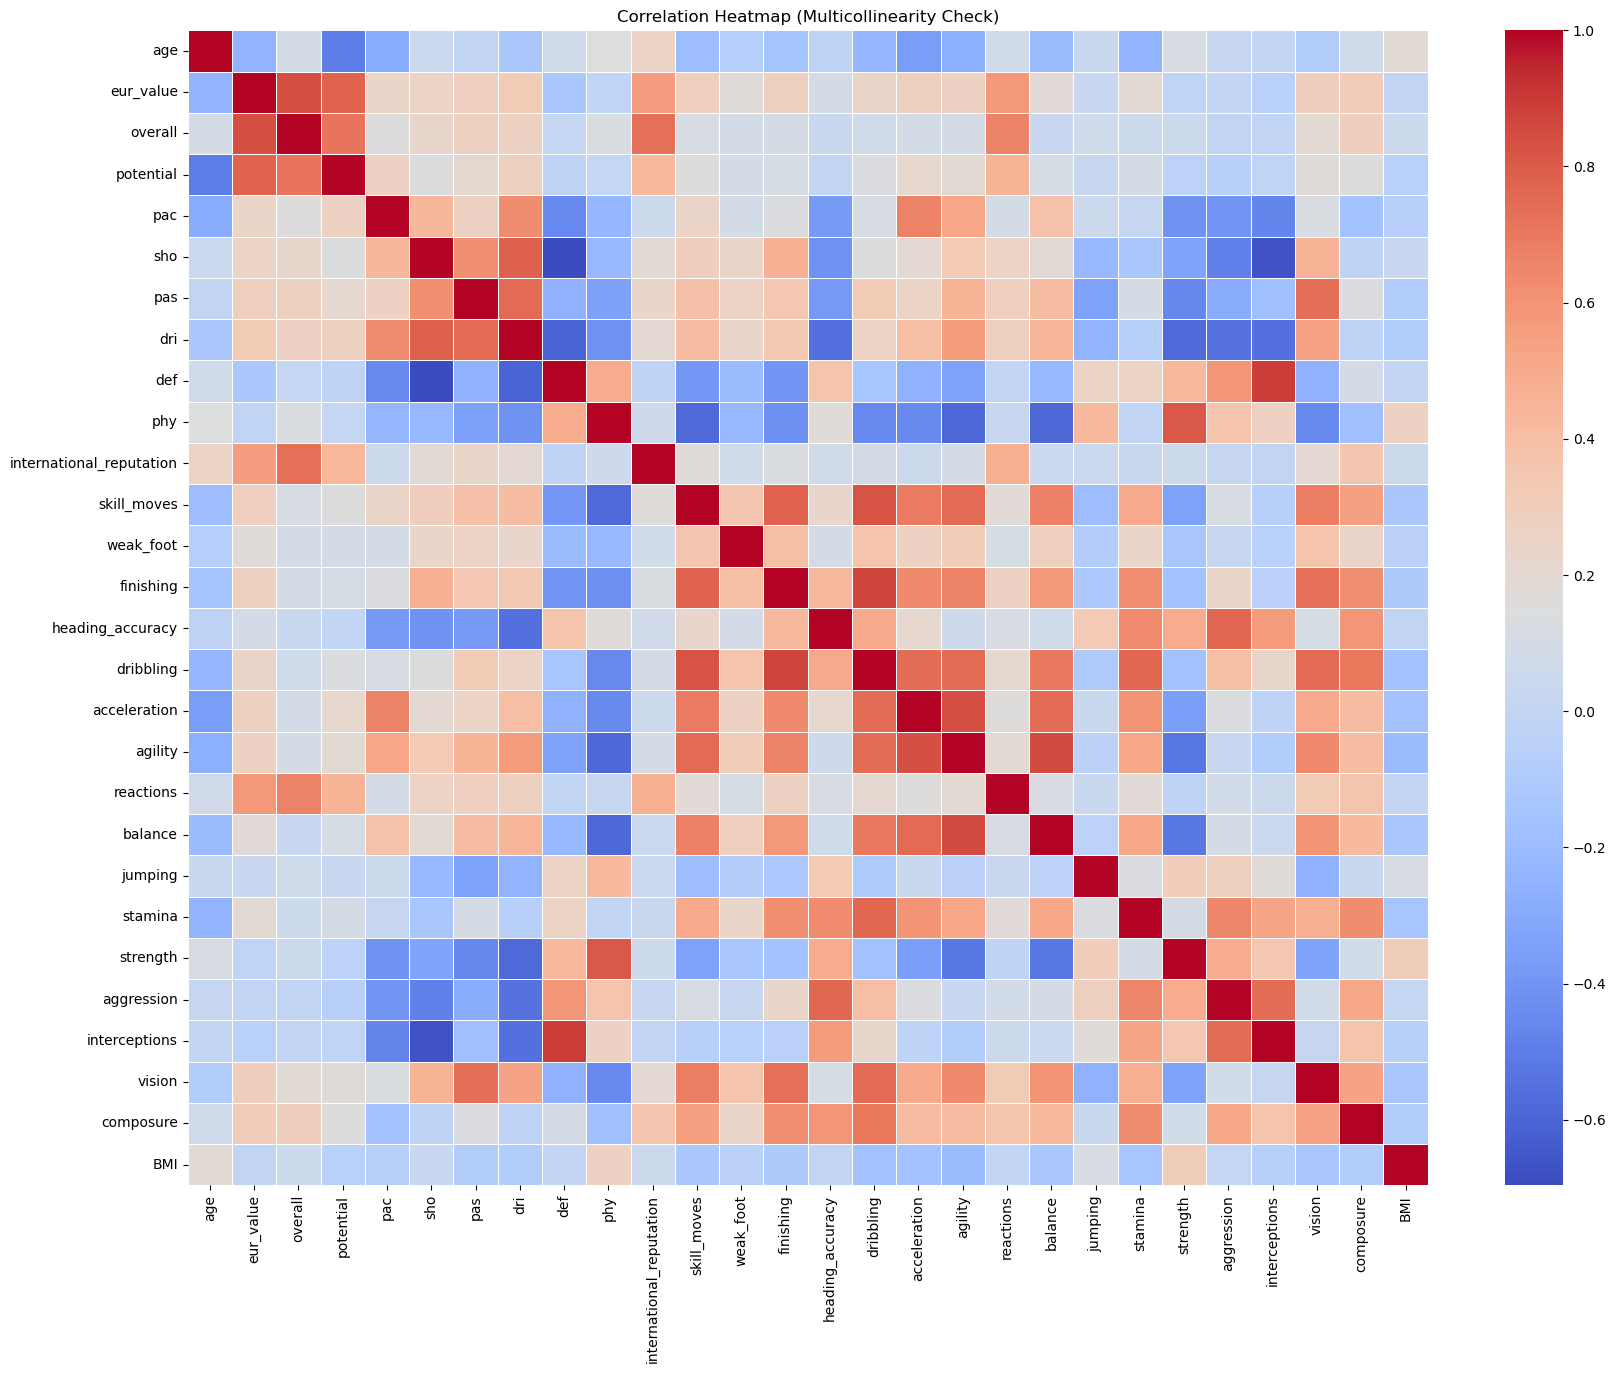

In [184]:
corr_matrix = X_scaled.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Multicollinearity Check)")
plt.show()

In [112]:
# --- Required Libraries ---
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

<Figure size 800x500 with 0 Axes>

<BarContainer object of 29 artists>

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 1.0, 'PCA Explained Variance (All Features)')

([<matplotlib.axis.XTick at 0x21f49451330>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29')])

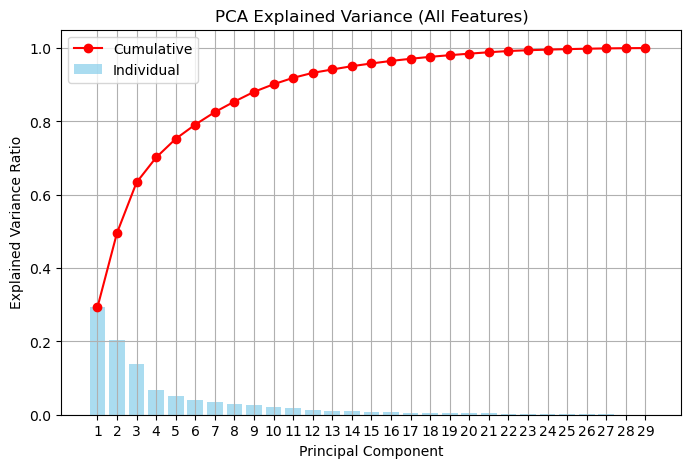

In [113]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA on all scaled features
pca = PCA()
pca_features = pca.fit_transform(X_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_

# Plot
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, color='skyblue', label='Individual')
plt.plot(range(1, len(explained_var)+1), explained_var.cumsum(), marker='o', color='red', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance (All Features)')
plt.xticks(range(1, len(explained_var)+1))
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 0, 'PCA 1')

Text(0.5, 0.5, 'PCA 2')

Text(0.5, 0, 'PCA 3')

Text(0.5, 0.92, '3D PCA Scatter Plot (First 3 Components)')

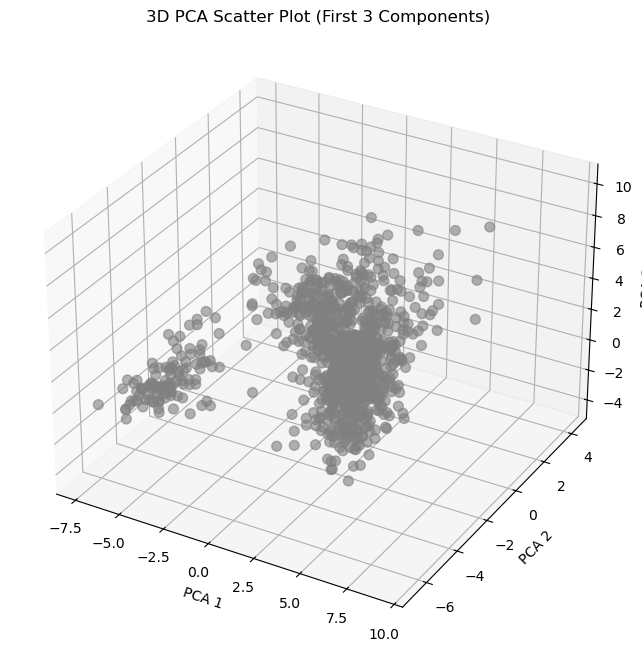

In [114]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA
pca = PCA(n_components=3, random_state=42)
X_pca_3 = pca.fit_transform(X_scaled)

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], 
           c='gray', s=50, alpha=0.6)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D PCA Scatter Plot (First 3 Components)')
plt.show()


In [115]:
from sklearn.decomposition import PCA

# Reduce to first 10 components
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Optional: check explained variance
explained_var = pca.explained_variance_ratio_
print("Explained variance by first 3 components:", explained_var.sum())


Explained variance by first 3 components: 0.633507535672986


In [116]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca_3)

# Add cluster labels to original data
df['Cluster'] = clusters

# Silhouette score
score = silhouette_score(X_pca_3, clusters)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.42488770474964155


c:\Users\fares\anaconda3\envs\deployEnv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0.5, 0, 'PCA 1')

Text(0.5, 0.5, 'PCA 2')

Text(0.5, 0, 'PCA 3')

Text(0.5, 0.92, '3D Scatter Plot of Clusters (KMeans)')

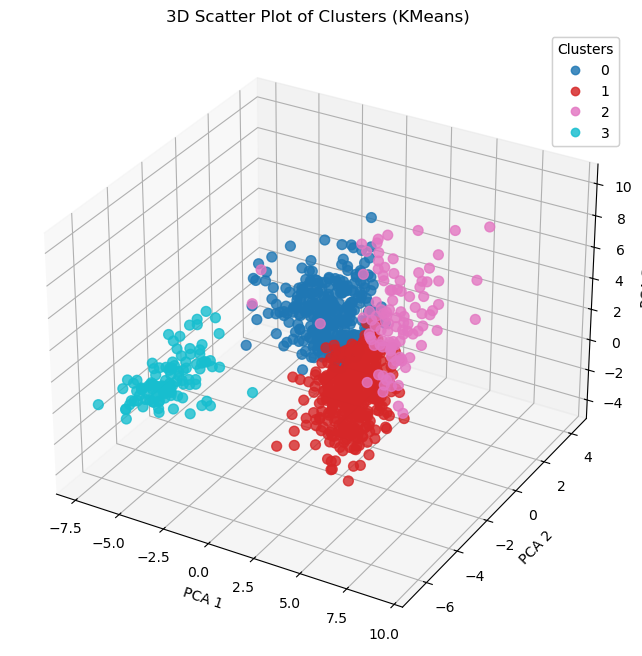

In [117]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], 
                     c=clusters, cmap='tab10', s=50, alpha=0.8)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Scatter Plot of Clusters (KMeans)')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()


In [118]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_pca, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.42488770474964155


In [119]:
df['Cluster'].value_counts()

Cluster
1    403
0    323
3    108
2    105
Name: count, dtype: int64

In [120]:
# Get cluster centroids in PCA space
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.91309146e+00  2.22772600e+00  2.18160473e-03]
 [ 1.82721845e+00 -5.37082575e-01 -1.22774770e+00]
 [ 3.40882889e+00  3.15222257e-01  3.34170756e+00]
 [-4.41081042e+00 -4.96490330e+00  1.32591083e+00]]


In [121]:
# Assuming X_pca contains the first 3 PCA components
# And pca is your trained PCA object
centroids_pca = kmeans.cluster_centers_  # shape (4,3)

# Transform back to scaled original space
centroids_scaled = pca.inverse_transform(centroids_pca)  # shape (4,29)

# Now inverse scale to get original values
centroids_original = scaler.inverse_transform(centroids_scaled)

# Convert to DataFrame
centroids_df = pd.DataFrame(centroids_original, columns=df.columns[:-1])
print(centroids_df)


         age     eur_value       eur_wage    overall  potential        pac  \
0  28.106213  1.324449e+07   59990.425826  79.780736  81.257504  64.533614   
1  26.426466  1.673269e+07   57088.117252  79.566810  81.924753  78.512194   
2  26.955116  4.385512e+07  178027.872001  86.062308  88.118310  79.047908   
3  29.449446  1.368072e+07   48015.320793  80.609774  81.988225  76.131465   

         sho        pas        dri        def        phy  \
0  55.417864  64.917119  65.909517  76.317813  79.210160   
1  71.742754  74.623230  80.157691  49.844672  67.572181   
2  76.521855  78.216706  82.825285  56.218707  74.441579   
3  78.712086  72.517176  81.046496  42.842400  76.945958   

   international_reputation  skill_moves  weak_foot  heading_accuracy  \
0                  2.144094     2.230240   3.029387         75.349338   
1                  2.083149     3.335291   3.454558         59.182157   
2                  3.496125     3.350823   3.545272         67.206088   
3               

In [122]:
# Suppose your cluster labels are 0-3 in df['Cluster']
# Map to positions
cluster_to_position = {
    0: 'DEF',
    1: 'AT',
    2: 'CM',
    3: 'GK'
}

df['Position'] = df['Cluster'].map(cluster_to_position)
df[['Cluster','Position']].head()


,Cluster,Position
0,2,CM
1,2,CM
2,2,CM
3,2,CM
4,2,CM


Text(0.5, 0, 'PCA 1')

Text(0.5, 0.5, 'PCA 2')

Text(0.5, 0, 'PCA 3')

Text(0.5, 0.92, 'Player Clusters by Position')

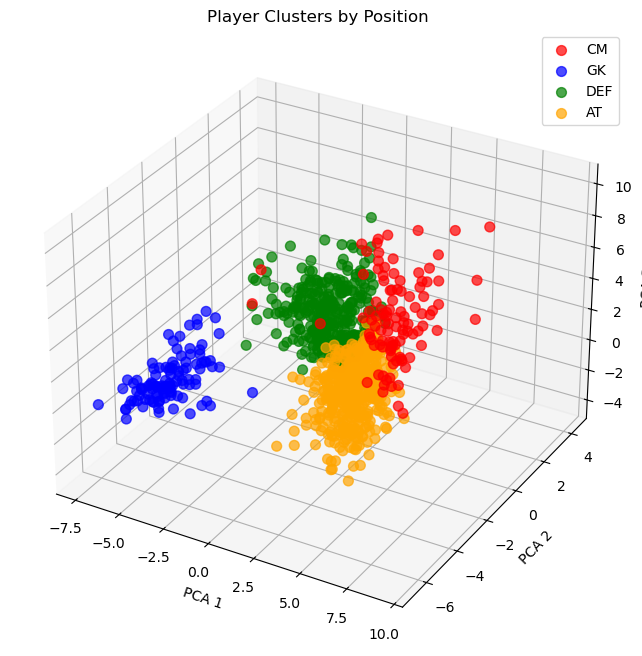

In [126]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Map clusters to position names
cluster_to_position = {3: 'GK', 0: 'DEF', 2: 'CM', 1: 'AT'}
df['Position'] = df['Cluster'].map(cluster_to_position)

# 3D scatter plot of first 3 PCA components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

positions = df['Position'].unique()
colors = ['red', 'blue', 'green', 'orange']  # one color per position

for pos, color in zip(positions, colors):
    indices = df['Position'] == pos
    ax.scatter(
        X_pca[indices, 0],
        X_pca[indices, 1],
        X_pca[indices, 2],
        c=color,
        label=pos,
        s=50,
        alpha=0.7
    )

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('Player Clusters by Position')
ax.legend()
plt.show()


In [ ]:
raw_df_clean = pd.read_csv("fifa_18_sample_data.csv")
raw_df_clean.dropna(inplace=True)

# ----------------------------------------------
# Step 2: Define position categories based on preference columns
# ----------------------------------------------
def assign_position(row):
    # Defensive
    def_cols = [
        'prefers_cb', 'prefers_lb', 'prefers_lcb', 'prefers_lwb',
        'prefers_rcb', 'prefers_rb', 'prefers_rwb'
    ]
    # Midfield
    cm_cols = [
        'prefers_lam','prefers_lcm','prefers_ldm','prefers_cf','prefers_cam','prefers_cm',
        'prefers_lm','prefers_cdm','prefers_rf','prefers_ram','prefers_rcm','prefers_rm','prefers_rdm'
    ]
    # Attacker
    at_cols = ['prefers_ls','prefers_lf','prefers_st','prefers_lw','prefers_rs','prefers_rw','prefers_rf']
    # Goalkeeper
    gk_cols = ['prefers_gk']
    
    if row[def_cols].any():
        return 'DEF'
    elif row[cm_cols].any():
        return 'CM'
    elif row[at_cols].any():
        return 'AT'
    elif row[gk_cols].any():
        return 'GK'
    else:
        return 'Unknown'

# ----------------------------------------------
# Step 3: Apply function to assign positions
# ----------------------------------------------
raw_df_clean['Assigned_Position'] = raw_df_clean.apply(assign_position, axis=1)

# ----------------------------------------------
# Step 4: Count number of players in each position
# ----------------------------------------------
position_counts = raw_df_clean['Assigned_Position'].value_counts()
print(position_counts)

# ----------------------------------------------
# Step 5: Compare with your clustering labels
# ----------------------------------------------
cluster_counts = df['Position'].value_counts()
print(cluster_counts)

Assigned_Position
CM     450
DEF    302
AT     135
GK     113
Name: count, dtype: int64
Position
AT     403
DEF    323
GK     108
CM     105
Name: count, dtype: int64
